# Client order 6 :: *ipynb solution draft* <br>

## Read Data

In [34]:
# Import libraries

import order_functions as of

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from persiantools import jdatetime

from scipy.stats import f_oneway

In [35]:
# Read data / Clean version of sales_data.csv

df = pd.read_csv("sales_data_clean.csv")
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,1396-10-26,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,1394-04-21,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,1402-05-24,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,1397-06-17,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,1392-09-30,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


In [36]:
# Convert Shamsi dates to Miladi


def vectorized_convert_shamsi_to_datetime(years, months, days):
    gregorian_dates = [
        jdatetime.JalaliDate(int(y), int(m), int(d)).to_gregorian()
        for y, m, d in zip(years, months, days)
    ]
    return pd.to_datetime(gregorian_dates)


years, months, days = zip(*df["Order_Date"].str.split("-").tolist())
df["Order_Date"] = vectorized_convert_shamsi_to_datetime(years, months, days)
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,2018-01-16,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,2015-07-12,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,2023-08-15,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,2018-09-08,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,2013-12-21,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


---

## Client Order #6

شرکت برنامه دارد تا به صورت ماهیانه، بار وارد کشور کند و برای همین می‌خواهد بداند، آیا میزان فروش در ماه‌های مختلف تفاوتی دارد؟ در صورت وجود تفاوت به چه نحوی بودجه‌ی سالیانه خود را بین این ماه‌ها تقسیم کند؟

In [37]:
df.head()

,Order_ID,Branch,Order_Date,Order_Priority,Manufacturer,Model_Name,Category,Screen_Size,RAM,OS,...,CPU_GHZ,Storage_SSD,Storage_HDD,Storage_Hybrid,Storage_Flash,Storage_Total,GPU_Brand,GPU_Model,Rating,Store
0,0,Hamedan,2018-01-16,H,Dell,Vostro 3568,Notebook,15.6,8,Windows,...,2.5,256,0,0,0,256,AMD,Radeon R5 M420,NaN,NaN
1,1,Kermanshah,2015-07-12,H,Lenovo,Yoga 720-13IKB,2 in 1 Convertible,13.3,8,Windows,...,2.5,256,0,0,0,256,Intel,HD Graphics 620,NaN,NaN
2,2,Rasht,2023-08-15,M,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,8,Windows,...,2.6,0,1024,0,0,1024,Nvidia,GeForce GTX 960M,NaN,NaN
3,3,Kermanshah,2018-09-08,H,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows,...,1.8,256,0,0,0,256,AMD,Radeon 530,NaN,NaN
4,4,Karaj,2013-12-21,L,Acer,Aspire E5-576G,Notebook,15.6,4,Windows,...,2.5,256,0,0,0,256,Nvidia,GeForce 940MX,NaN,NaN


In [38]:
df.columns

Index(['Order_ID', 'Branch', 'Order_Date', 'Order_Priority', 'Manufacturer',
       'Model_Name', 'Category', 'Screen_Size', 'RAM', 'OS', 'OS_Version',
       'Weight', 'Price', 'Quantity', 'Discount', 'Total_Price', 'Profit',
       'Ship_Duration', 'Screen_Type', 'Screen_resolution', 'CPU_Brand',
       'CPU_Model', 'CPU_GHZ', 'Storage_SSD', 'Storage_HDD', 'Storage_Hybrid',
       'Storage_Flash', 'Storage_Total', 'GPU_Brand', 'GPU_Model', 'Rating',
       'Store'],
      dtype='object')

In [39]:
# Filter columns needed for analysis and create a new dataframe

cols_for_analyze_6 = [
    "Order_Date",
    "Total_Price",
]
df6 = df[cols_for_analyze_6].copy()

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Order_Date   1017081 non-null  datetime64[ns]
 1   Total_Price  1017081 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.5 MB


In [40]:
# Add column 'Year' & 'Month', and drop column 'Order_Date'

df6["Year"] = df6["Order_Date"].dt.year
df6["Month"] = df6["Order_Date"].dt.month

df6.drop("Order_Date", axis=1, inplace=True)

df6.head()

,Total_Price,Year,Month
0,3450000,2018,1
1,3400000,2015,7
2,44900000,2023,8
3,12550000,2018,9
4,2050000,2013,12


### CPI :: Consumer Price Index
The CPI is an index that measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.<br>
It is one of the most widely used statistics for identifying periods of inflation or deflation.



Consumer Price Index for Islamic Republic of Iran   <br>
Source 1: https://fred.stlouisfed.org/series/DDOE01IRA086NWDB   <br>
Source 2: https://ycharts.com/indicators/iran_consumer_price_index_wdi  <br>
Source 3: https://tradingeconomics.com/iran/consumer-price-index-cpi    <br>

In [41]:
# Update prices based on CPI (Consumer Price Index) values

annual_cpi_values = {
    2010: 106.52,
    2011: 130.086,
    2012: 177.219,
    2013: 229.694,
    2014: 268.342,
    2015: 293.48,
    2016: 319.56,
    2017: 351.61,
    2018: 393.78,
    2019: 550.93,
    2020: 719.48,
    2021: 1031.66,
    2022: 1211.5619,
    2023: 2144.3869,
}

In [42]:
# Create function monthly CPI values assuming linear annual growth
def monthly_cpi_values(row):
    month_curr = row["Month"]
    year_curr = row["Year"]
    month_cpi = 0

    month_cpi = annual_cpi_values[year_curr] + (
        month_curr
        * (annual_cpi_values[year_curr] - annual_cpi_values[year_curr - 1])
        / 12
    )

    return month_cpi


# Create new column 'CPI' and apply function monthly_cpi_values
df6["CPI"] = df6.apply(monthly_cpi_values, axis=1)

# Create new column 'Total_Price_Adjusted' and apply CPI values
df6["Total_Price_Adjusted"] = df6["Total_Price"] * df6["CPI"] / 100

df6.head()

,Total_Price,Year,Month,CPI,Total_Price_Adjusted
0,3450000,2018,1,397.294167,1.370665e+07
1,3400000,2015,7,308.143833,1.047689e+07
2,44900000,2023,8,2766.270233,1.242055e+09
3,12550000,2018,9,425.407500,5.338864e+07
4,2050000,2013,12,282.169000,5.784464e+06


In [43]:
# Aggregate data by month and year summing up 'Total_Price_Adjusted'

df_sales_month_year = (
    df6.groupby(["Year", "Month"]).agg({"Total_Price_Adjusted": "sum"}).reset_index()
)

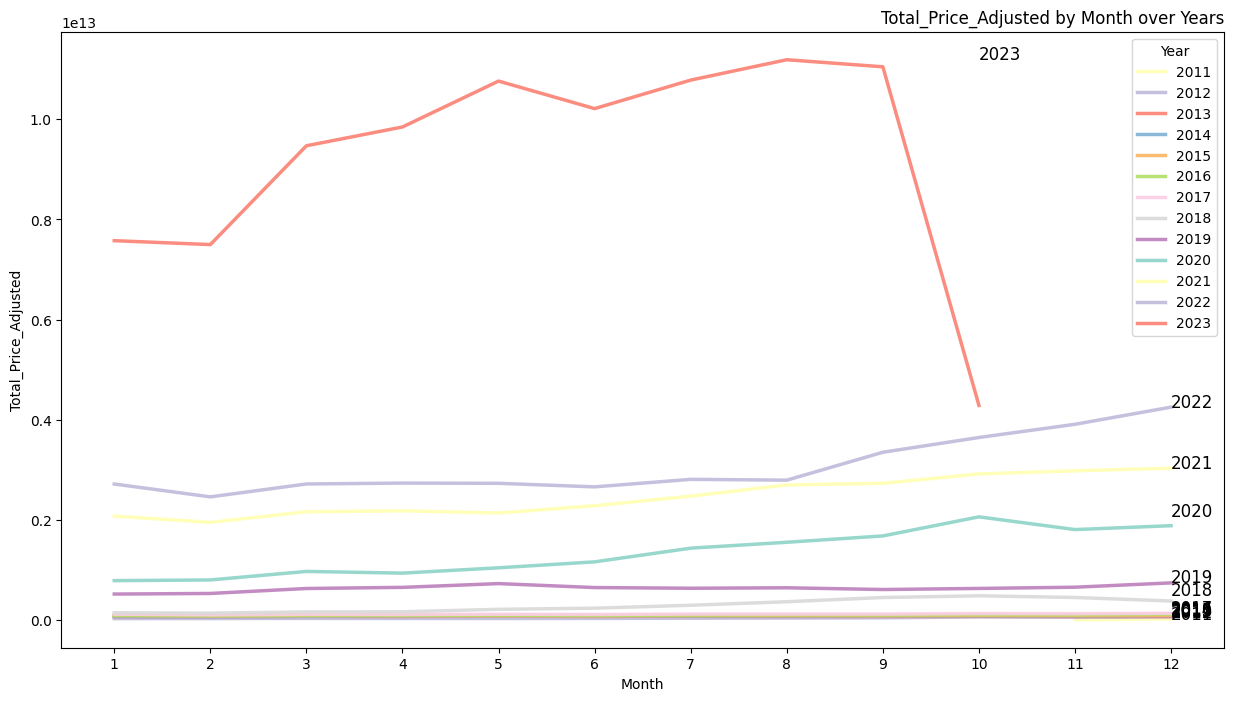

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
palette = plt.get_cmap("Set3")

for year in df_sales_month_year["Year"].unique():
    subset = df_sales_month_year[df_sales_month_year["Year"] == year]
    plt.plot(
        subset["Month"],
        subset["Total_Price_Adjusted"],
        marker="",
        color=palette(year % 10),
        linewidth=2.5,
        alpha=0.9,
        label=year,
    )

plt.legend(title="Year")
plt.title(
    "Total_Price_Adjusted by Month over Years", loc="right", fontsize=12, fontweight=0
)
plt.xlabel("Month")
plt.ylabel("Total_Price_Adjusted")
plt.xticks(
    df_sales_month_year["Month"].unique()
)  # To ensure all months are displayed on x-axis
for year in df_sales_month_year["Year"].unique():
    subset = df_sales_month_year[df_sales_month_year["Year"] == year]
    plt.text(
        max(subset["Month"]),
        max(subset["Total_Price_Adjusted"]),
        str(year),
        fontsize=12,
    )
plt.show()

> There seems a sudden anormal drop in sales for month 10 of year 2023, probably due to lack of updated data    <br>
> So we will remove 2023-10 data

In [45]:
# remove 2023-10 data

df_sales_month_year = df_sales_month_year[
    (df_sales_month_year["Year"] != 2023) | (df_sales_month_year["Month"] != 10)
]
df_sales_month_year[df_sales_month_year["Year"] == 2023]

,Year,Month,Total_Price_Adjusted
134,2023,1,7.575003e+12
135,2023,2,7.496770e+12
136,2023,3,9.471122e+12
137,2023,4,9.846445e+12
138,2023,5,1.076349e+13
139,2023,6,1.021344e+13
140,2023,7,1.078339e+13
141,2023,8,1.119016e+13
142,2023,9,1.104888e+13


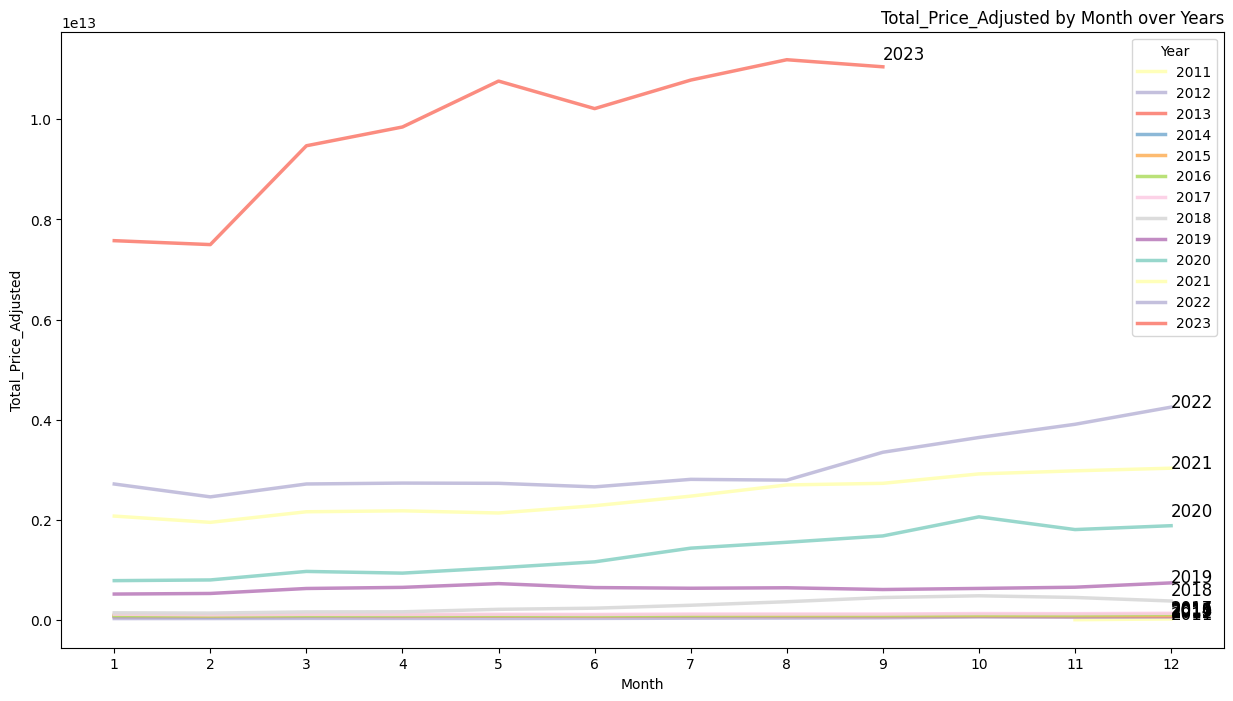

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
palette = plt.get_cmap("Set3")

for year in df_sales_month_year["Year"].unique():
    subset = df_sales_month_year[df_sales_month_year["Year"] == year]
    plt.plot(
        subset["Month"],
        subset["Total_Price_Adjusted"],
        marker="",
        color=palette(year % 10),
        linewidth=2.5,
        alpha=0.9,
        label=year,
    )

plt.legend(title="Year")
plt.title(
    "Total_Price_Adjusted by Month over Years", loc="right", fontsize=12, fontweight=0
)
plt.xlabel("Month")
plt.ylabel("Total_Price_Adjusted")
plt.xticks(
    df_sales_month_year["Month"].unique()
)  # To ensure all months are displayed on x-axis
for year in df_sales_month_year["Year"].unique():
    subset = df_sales_month_year[df_sales_month_year["Year"] == year]
    plt.text(
        max(subset["Month"]),
        max(subset["Total_Price_Adjusted"]),
        str(year),
        fontsize=12,
    )
plt.show()

> There seems to be an unusual sales trend in year 2023.  <br>
> Thus, we keep on with two sales stats, with or without 2023 <br>

In [47]:
df_without_2023 = df_sales_month_year[(df_sales_month_year["Year"] != 2023)]
df_with_2023 = df_sales_month_year

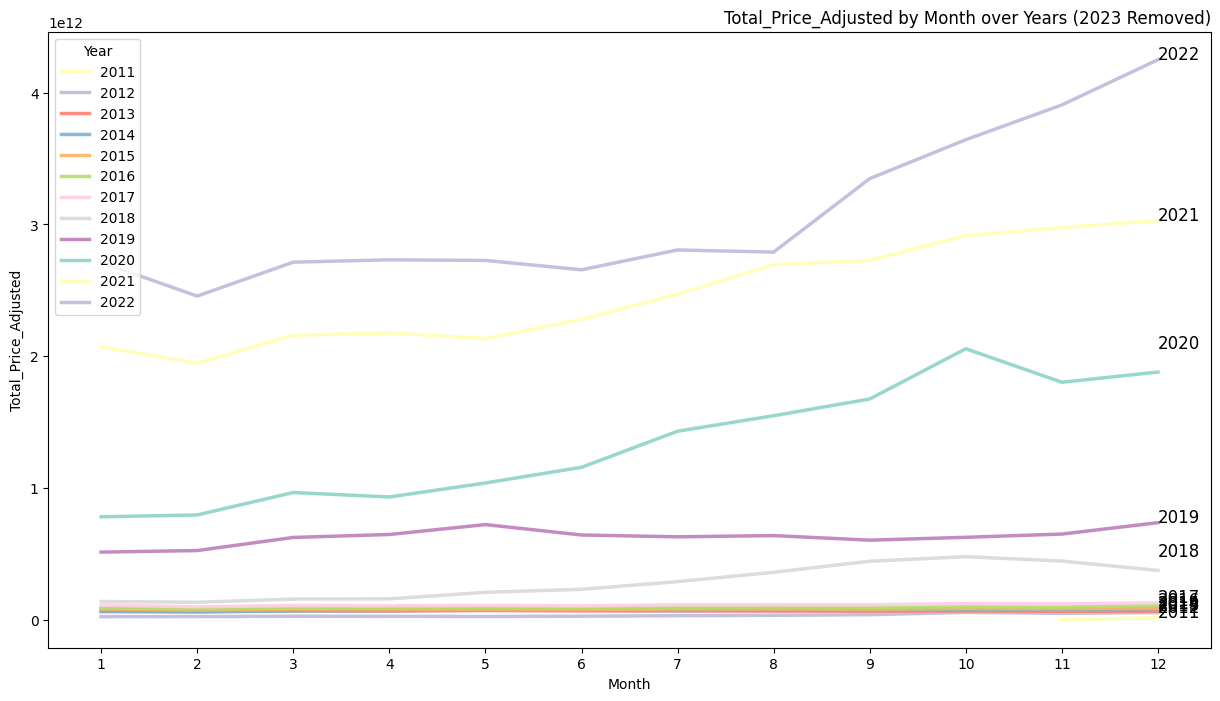

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
palette = plt.get_cmap("Set3")

for year in df_without_2023["Year"].unique():
    subset = df_without_2023[df_without_2023["Year"] == year]
    plt.plot(
        subset["Month"],
        subset["Total_Price_Adjusted"],
        marker="",
        color=palette(year % 10),
        linewidth=2.5,
        alpha=0.9,
        label=year,
    )

plt.legend(title="Year")
plt.title(
    "Total_Price_Adjusted by Month over Years (2023 Removed)",
    loc="right",
    fontsize=12,
    fontweight=0,
)
plt.xlabel("Month")
plt.ylabel("Total_Price_Adjusted")
plt.xticks(df_without_2023["Month"].unique())
for year in df_without_2023["Year"].unique():
    subset = df_without_2023[df_without_2023["Year"] == year]
    plt.text(
        max(subset["Month"]),
        max(subset["Total_Price_Adjusted"]),
        str(year),
        fontsize=12,
    )
plt.show()

In [49]:
# Conduct ANOVA (Analysis of Variance) test on monthly sales data omitting 2023

months = df_without_2023["Month"].unique()
monthly_data = [
    df_without_2023[df_without_2023["Month"] == month]["Total_Price_Adjusted"]
    for month in months
]

f_stat, p_value = f_oneway(*monthly_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the monthly sales.")
else:
    print("There is no statistically significant difference between the monthly sales.")

F-statistic: 0.14016214886702266
P-value: 0.9994980992163102
There is no statistically significant difference between the monthly sales.


In [50]:
# Conduct ANOVA (Analysis of Variance) test on monthly sales data considering 2023

months = df_with_2023["Month"].unique()
monthly_data = [
    df_with_2023[df_with_2023["Month"] == month]["Total_Price_Adjusted"]
    for month in months
]

f_stat, p_value = f_oneway(*monthly_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the monthly sales.")
else:
    print("There is no statistically significant difference between the monthly sales.")

F-statistic: 0.1599839207294677
P-value: 0.9990661088296511
There is no statistically significant difference between the monthly sales.


> Both tests show that there are no statistically significant difference between monthly sales of different years.  <br>
> And we can allocate budget equally between different months.

> Even though, we can remark some weak sales increase in 4 or 5 last months of the year.    <br>
> Then we suggest to allocate more budget on importing laptop with sales time target of those months.

> **Important** <br>
> Cause there might be a misinterpretation in the meaning of 'Total Sales' we will test the **QUANTITY** as the metric

In [51]:

cols_for_analyze_6_q = [
    "Order_Date",
    "Quantity",
]
dfq = df[cols_for_analyze_6_q].copy()

dfq["Year"] = dfq["Order_Date"].dt.year
dfq["Month"] = dfq["Order_Date"].dt.month

dfq.drop("Order_Date", axis=1, inplace=True)

dfq = (
    dfq.groupby(["Year", "Month"]).agg({"Quantity": "sum"}).reset_index()
)

dfq.head()

,Year,Month,Quantity
0,2011,11,992
1,2011,12,8082
2,2012,1,7955
3,2012,2,7290
4,2012,3,7968


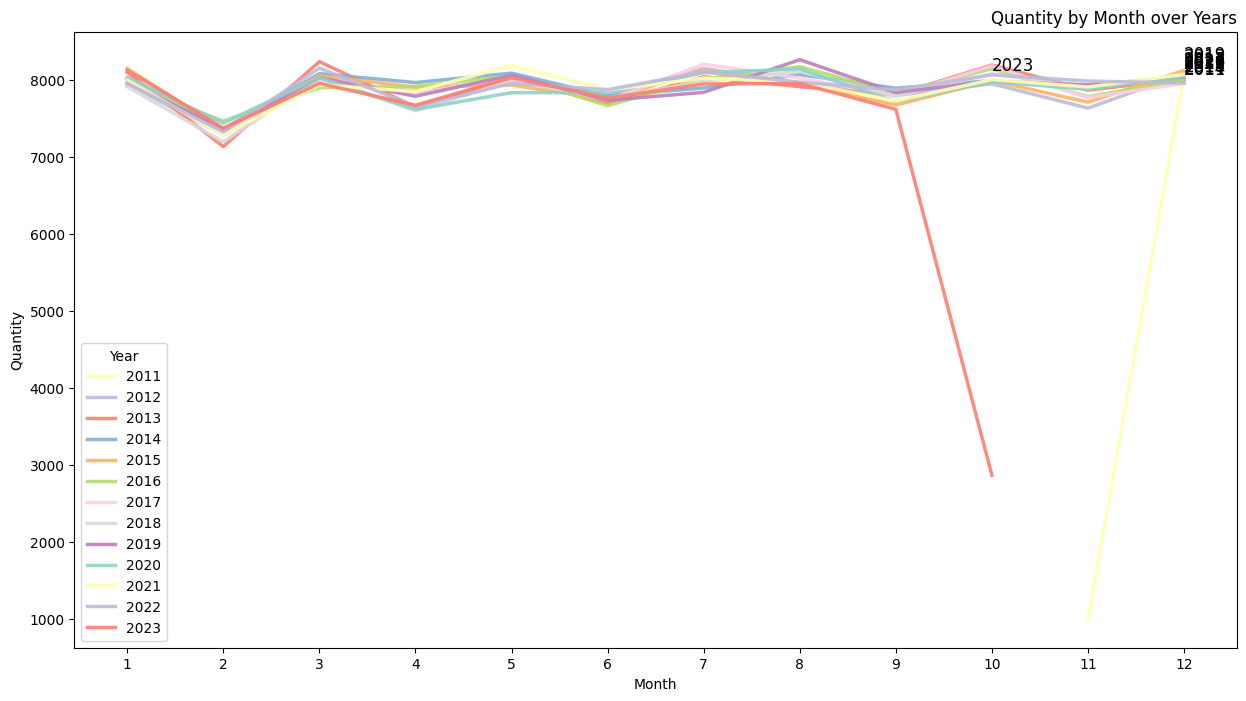

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
palette = plt.get_cmap("Set3")

for year in dfq["Year"].unique():
    subset = dfq[dfq["Year"] == year]
    plt.plot(
        subset["Month"],
        subset["Quantity"],
        marker="",
        color=palette(year % 10),
        linewidth=2.5,
        alpha=0.9,
        label=year,
    )

plt.legend(title="Year")
plt.title(
    "Quantity by Month over Years", loc="right", fontsize=12, fontweight=0
)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.xticks(
    dfq["Month"].unique()
)
for year in dfq["Year"].unique():
    subset = dfq[dfq["Year"] == year]
    plt.text(
        max(subset["Month"]),
        max(subset["Quantity"]),
        str(year),
        fontsize=12,
    )
plt.show()

In [53]:
dfq[dfq['Year'] == 2011]

,Year,Month,Quantity
0,2011,11,992
1,2011,12,8082


> There seems we do not have enough data for year 2011, so we will remove this year.

In [54]:
dfq = dfq[dfq['Year'] != 2011]

> There seems a sudden anormal drop in sales for month 10 of year 2023, probably due to lack of updated data    <br>
> So we will remove 2023-10 data

In [55]:
# remove 2023-10 data

dfq = dfq[(dfq["Year"] != 2023) | (dfq["Month"] != 10)]
dfq[dfq["Year"] == 2023]

,Year,Month,Quantity
134,2023,1,8130
135,2023,2,7378
136,2023,3,7959
137,2023,4,7676
138,2023,5,8035
139,2023,6,7769
140,2023,7,7952
141,2023,8,7959
142,2023,9,7623


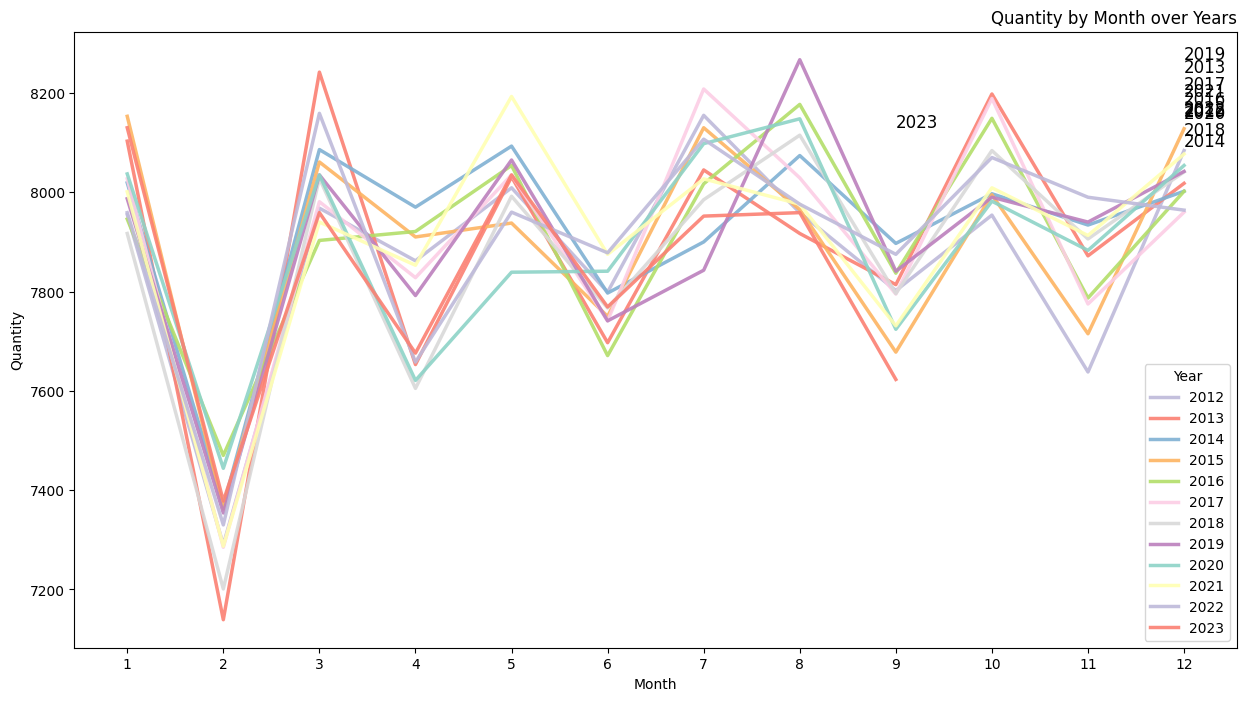

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
palette = plt.get_cmap("Set3")

for year in dfq["Year"].unique():
    subset = dfq[dfq["Year"] == year]
    plt.plot(
        subset["Month"],
        subset["Quantity"],
        marker="",
        color=palette(year % 10),
        linewidth=2.5,
        alpha=0.9,
        label=year,
    )

plt.legend(title="Year")
plt.title(
    "Quantity by Month over Years", loc="right", fontsize=12, fontweight=0
)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.xticks(
    dfq["Month"].unique()
)
for year in dfq["Year"].unique():
    subset = dfq[dfq["Year"] == year]
    plt.text(
        max(subset["Month"]),
        max(subset["Quantity"]),
        str(year),
        fontsize=12,
    )
plt.show()

In [57]:
# Conduct ANOVA (Analysis of Variance) test on monthly sales data with QUANTITY as metric

months = dfq["Month"].unique()
monthly_data = [
    dfq[dfq["Month"] == month]["Quantity"]
    for month in months
]

f_stat, p_value = f_oneway(*monthly_data)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the monthly sales.")
else:
    print("There is no statistically significant difference between the monthly sales.")

F-statistic: 62.757278980852774
P-value: 2.4611304757567674e-46
There is a statistically significant difference between the monthly sales.


> P-Value << 0  <br>
> Here the test shows that there is statistically significant difference between monthly sales of different years.  <br>

> We can see significant sales jump in months: **1, 3, 5, 7, 8, 12**    <br>
> We can propose to allocate budget in a way to support high sales requests in months mentioned.    <br>